In [2]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
#from sklearn.model_selection import df_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

import re
from acquire import extract, build_extracted_df, get_new_patch_data, get_players
from prepare import prepare, clean, main_rename, team_difference_stats, split
from env import api_key

In [7]:
df = pd.read_csv("final_10.csv")

In [8]:
train, test = prepare(df)

In [9]:
train.winningTeam.isna().sum()

0

In [10]:
len(train) # 1977

1977

In [16]:
to_drop=['gameEndTimestamp',
'gameId',
'gameMode',
'gameName',
'gameStartTimestamp',
'gameType',
'gameVersion',
'matchId',
'queueId',
'timestamp',
'time_cutoff',
'ward_player_0',
'riftherald_team300',
'gameDuration',
'Unnamed: 0']

In [17]:
def add_scaled_columns(train, test, scaler, columns_to_scale):
    
    # new column names
    new_column_names = [c + '_scaled' for c in columns_to_scale]
    
    # Fit the scaler on the train
    scaler.fit(train[columns_to_scale])
    
    # transform train validate and test
    train = pd.concat([
        train,
        pd.DataFrame(scaler.transform(train[columns_to_scale]), columns=new_column_names, index=train.index),
    ], axis=1)
    
    train = train.drop(columns=columns_to_scale)
    
#     validate = pd.concat([
#         validate,
#         pd.DataFrame(scaler.transform(validate[columns_to_scale]), columns=new_column_names, index=validate.index),
#     ], axis=1)
    
    
    test = pd.concat([
        test,
        pd.DataFrame(scaler.transform(test[columns_to_scale]), columns=new_column_names, index=test.index),
    ], axis=1)
    
    test = test.drop(columns=columns_to_scale)
    
    return train, test

In [18]:
def clusters(features, train, n):
    '''
    Where X are the features and train is Well...Train
    '''
    # Creating X passing in the desired features
    X = train[features]

    #define the thing
    kmeans = KMeans(n_clusters=n, random_state=1349)

    # fit the thing
    kmeans.fit(X)

    # Use (predict using) the thing 
    kmeans.predict(X)
    
    # make a new column names cluster in iris and X_scaled dataframe
    df = pd.DataFrame()
    df['cluster'] = kmeans.predict(X)

    X['cluster'] = kmeans.predict(X)
    print(X.cluster.value_counts())
    with plt.style.context('seaborn-whitegrid'):
        plt.figure(figsize=(9, 6))
        pd.Series({k: KMeans(k).fit(X).inertia_ for k in range(2, 12)}).plot(marker='x')
        plt.xticks(range(2, 12))
        plt.xlabel('k')
        plt.ylabel('inertia')
        plt.title('Change in inertia as k increases')
        
   
    return df

In [19]:
train = train.drop(columns=to_drop)
test = test.drop(columns=to_drop)

In [20]:
columns_to_scale = list(train.drop(columns=['winningTeam']).columns)

In [21]:
train, test = add_scaled_columns(train, test, MinMaxScaler(), columns_to_scale)

In [33]:
train = pd.read_csv("final10_train_scaled.csv")
test = pd.read_csv("final10_test_scaled.csv")

In [34]:
train.winningTeam.isna().sum()

0

# Starting here

In [32]:
test.winningTeam.isna().sum()

0

In [35]:
features = ['BlueTopAssists_scaled', 'BlueJungleAssists_scaled', 'BlueMidAssists_scaled', 'BlueADCAssists_scaled', 'BlueSupportAssists_scaled', 'BlueTeamTowersLost_scaled', 'BlueTopCurrentGold_scaled', 'BlueJungleCurrentGold_scaled', 'BlueMidCurrentGold_scaled', 'BlueADCCurrentGold_scaled', 'BlueSupportCurrentGold_scaled', 'BlueTopDeaths_scaled', 'BlueJungleDeaths_scaled', 'BlueMidDeaths_scaled', 'BlueADCDeaths_scaled', 'BlueSupportDeaths_scaled', 'BlueTeamDragons_scaled', 'BlueTeamEarthDragon_scaled', 'BlueTeamFireDragon_scaled', 'BlueTeamHextechDragon_scaled', 'BlueTeamWaterDragon_scaled', 'BlueTeamChemtechDragon_scaled', 'BlueTeamAirDragon_scaled', 'BlueTopgoldPerSecond_scaled', 'BlueJunglegoldPerSecond_scaled', 'BlueMidgoldPerSecond_scaled', 'BlueADCgoldPerSecond_scaled', 'BlueSupportgoldPerSecond_scaled', 'BlueTopJungleMinionsKilled_scaled', 'BlueJungleJungleMinionsKilled_scaled', 'BlueMidJungleMinionsKilled_scaled', 'BlueADCJungleMinionsKilled_scaled', 'BlueSupportJungleMinionsKilled_scaled', 'BlueTopKills_scaled', 'BlueJungleKills_scaled', 'BlueMidKills_scaled', 'BlueADCKills_scaled', 'BlueSupportKills_scaled', 'BlueTopLevel_scaled', 'BlueJungleLevel_scaled', 'BlueMidLevel_scaled', 'BlueADCLevel_scaled', 'BlueSupportLevel_scaled', 'BlueTopMagicDamageDoneToChampions_scaled', 'BlueJungleMagicDamageDoneToChampions_scaled', 'BlueMidMagicDamageDoneToChampions_scaled', 'BlueADCMagicDamageDoneToChampions_scaled', 'BlueSupportMagicDamageDoneToChampions_scaled', 'BlueTopMinionsKilled_scaled', 'BlueJungleMinionsKilled_scaled', 'BlueMidMinionsKilled_scaled', 'BlueADCMinionsKilled_scaled', 'BlueSupportMinionsKilled_scaled', 'BlueTopPhysicalDamageDoneToChampions_scaled', 'BlueJunglePhysicalDamageDoneToChampions_scaled', 'BlueMidPhysicalDamageDoneToChampions_scaled', 'BlueADCPhysicalDamageDoneToChampions_scaled', 'BlueSupportPhysicalDamageDoneToChampions_scaled', 'BlueTopTimeEnemySpentControlled_scaled', 'BlueJungleTimeEnemySpentControlled_scaled', 'BlueMidTimeEnemySpentControlled_scaled', 'BlueADCTimeEnemySpentControlled_scaled', 'BlueSupportTimeEnemySpentControlled_scaled', 'BlueTopTotalDamageDoneToChampions_scaled', 'BlueJungleTotalDamageDoneToChampions_scaled', 'BlueMidTotalDamageDoneToChampions_scaled', 'BlueADCTotalDamageDoneToChampions_scaled', 'BlueSupportTotalDamageDoneToChampions_scaled', 'BlueTopTotalGold_scaled', 'BlueJungleTotalGold_scaled', 'BlueMidTotalGold_scaled', 'BlueADCTotalGold_scaled', 'BlueSupportTotalGold_scaled', 'BlueTopTrueDamageDoneToChampions_scaled', 'BlueJungleTrueDamageDoneToChampions_scaled', 'BlueMidTrueDamageDoneToChampions_scaled', 'BlueADCTrueDamageDoneToChampions_scaled', 'BlueSupportTrueDamageDoneToChampions_scaled', 'BlueTopWard_scaled', 'BlueJungleWard_scaled', 'BlueMidWard_scaled', 'BlueADCWard_scaled', 'BlueSupportWard_scaled', 'BlueTopXp_scaled', 'BlueJungleXp_scaled', 'BlueMidXp_scaled', 'BlueADCXp_scaled', 'BlueSupportXp_scaled']

<ipython-input-18-28a934079a2a>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['cluster'] = kmeans.predict(X)


1    1053
0     531
2     393
Name: cluster, dtype: int64


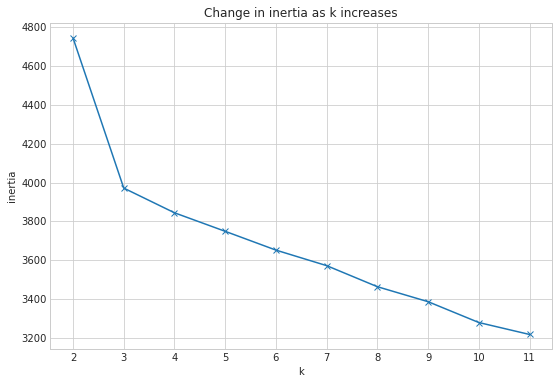

In [36]:
df = clusters(features, train, 3)

In [37]:
train = pd.concat([train, df], axis = 1)
boolean_dummy = pd.get_dummies(train['cluster'], drop_first=False)
train = pd.concat([train, boolean_dummy], axis = 1)

In [38]:
train = train.rename(columns = {
            0:'every_cluster_0', 
            1:'every_cluster_1',
            2:'every_cluster_2',
            'cluster':'everything_cluster'})

In [40]:
X_train = train[[
'BlueTeamLevelDifference_scaled',
'BlueTeamXpDifference_scaled',
'BlueTeamWardDifference_scaled',
'BlueTeamminionKillDifference_scaled',
'BlueTeamDeathsDifference_scaled',
'BlueTeamMagicDmgDifference_scaled',
'BlueTeamPhysicalDmgDifference_scaled',
'BlueTeamTrueDmgDifference_scaled',
'BlueTeamTotalDmgDifference_scaled',
'BlueTeamTotalMinionsMonstersDifference_scaled',
'BlueTeamTimeCCingDifference_scaled',
'BlueteamWardDifference_scaled',
'BlueteamAssistDifference_scaled',
'BlueBotLaneKillDifference_scaled',
'BlueJungTopkillDifference_scaled',
'BlueTeamWaterDragonDifference_scaled',
'BlueTeamAirDragonDifference_scaled',
'BlueTeamChemtechDragonDifference_scaled',
'BlueTeamFireDragonDifference_scaled',
'BlueTeamHextechDragonDifference_scaled',
'BlueTeamEarthDragonDifference_scaled']]

In [41]:
y_train = train['winningTeam']

In [42]:
high = 0
highdepth = 0
highleaf = 0
for leaf in range(1, 25):
    for depth in range(1,25):
        rf = RandomForestClassifier(bootstrap=True, 
                            class_weight=None, 
                            criterion='gini',
                            min_samples_leaf=leaf,
                            n_estimators=100,
                            max_depth=depth, 
                            random_state=123)
        results = cross_val_score(rf, X_train, y_train, cv=3)
        if results.mean() > high:
            high = results.mean()
            highdepth = depth
            highleaf = leaf
            print(high, highdepth, highleaf)

0.6307536671724835 1 1
0.6322711178553363 2 1
0.6413758219524532 4 1
0.6433990895295902 6 1
0.6439049064238745 6 3


In [43]:
X_train = train[[
'every_cluster_0',
'every_cluster_1',
'every_cluster_2',
'BlueTeamLevelDifference_scaled',
'BlueTeamXpDifference_scaled',
'BlueTeamWardDifference_scaled',
'BlueTeamminionKillDifference_scaled',
'BlueTeamDeathsDifference_scaled',
'BlueTeamMagicDmgDifference_scaled',
'BlueTeamPhysicalDmgDifference_scaled',
'BlueTeamTrueDmgDifference_scaled',
'BlueTeamTotalDmgDifference_scaled',
'BlueTeamTotalMinionsMonstersDifference_scaled',
'BlueTeamTimeCCingDifference_scaled',
'BlueteamWardDifference_scaled',
'BlueteamAssistDifference_scaled',
'BlueBotLaneKillDifference_scaled',
'BlueJungTopkillDifference_scaled',
'BlueTeamWaterDragonDifference_scaled',
'BlueTeamAirDragonDifference_scaled',
'BlueTeamChemtechDragonDifference_scaled',
'BlueTeamFireDragonDifference_scaled',
'BlueTeamHextechDragonDifference_scaled',
'BlueTeamEarthDragonDifference_scaled']]

y_train = train['winningTeam']

high = 0
highdepth = 0
highleaf = 0
for leaf in range(1, 25):
    for depth in range(1,25):
        rf = RandomForestClassifier(bootstrap=True, 
                            class_weight=None, 
                            criterion='gini',
                            min_samples_leaf=leaf,
                            n_estimators=100,
                            max_depth=depth, 
                            random_state=123)
        results = cross_val_score(rf, X_train, y_train, cv=3)
        if results.mean() > high:
            high = results.mean()
            highdepth = depth
            highleaf = leaf
            print(high, highdepth, highleaf)

0.6282245827010622 1 1
0.6322711178553363 2 1
0.6327769347496206 3 1
0.6403641881638847 4 1
0.646433990895296 6 1
0.6489630753667173 12 7


In [44]:
X_train = train[[
'every_cluster_0',
'every_cluster_1',
'every_cluster_2']]

y_train = train['winningTeam']

high = 0
highdepth = 0
highleaf = 0
for leaf in range(1, 25):
    for depth in range(1,25):
        rf = RandomForestClassifier(bootstrap=True, 
                            class_weight=None, 
                            criterion='gini',
                            min_samples_leaf=leaf,
                            n_estimators=100,
                            max_depth=depth, 
                            random_state=123)
        results = cross_val_score(rf, X_train, y_train, cv=3)
        if results.mean() > high:
            high = results.mean()
            highdepth = depth
            highleaf = leaf
            print(high, highdepth, highleaf)

0.5685381891755185 1 1


In [45]:
X_train = train[[
'every_cluster_0',
'every_cluster_1',
'every_cluster_2',
'BlueSupportStats_scaled',
'RedSupportStats_scaled',
'BlueSupportDifference_scaled',
'BlueTopKda_scaled',
'BlueJungleKda_scaled',
'BlueMidKda_scaled',
'BlueBotKda_scaled',
'BlueSupportKda_scaled',
'RedTopKda_scaled',
'RedJungleKda_scaled',
'RedMidKda_scaled',
'RedBotKda_scaled',
'RedSupportKda_scaled',
'BlueTeamKdaDifference_scaled',
'BlueJungleGankHeavy_scaled',
'BlueTeamJungleDiffy_scaled',
'RedJungleGankHeavy_scaled']]

y_train = train['winningTeam']

high = 0
highdepth = 0
highleaf = 0
for leaf in range(1, 25):
    for depth in range(1,25):
        rf = RandomForestClassifier(bootstrap=True, 
                            class_weight=None, 
                            criterion='gini',
                            min_samples_leaf=leaf,
                            n_estimators=100,
                            max_depth=depth, 
                            random_state=123)
        results = cross_val_score(rf, X_train, y_train, cv=3)
        if results.mean() > high:
            high = results.mean()
            highdepth = depth
            highleaf = leaf
            print(high, highdepth, highleaf)

0.603439554881133 1 1
0.6079919069296914 3 1
0.6084977238239757 4 1
0.6100151745068285 6 7
0.6125442589782498 7 13


In [46]:
X_train = train[['BlueSupportStats_scaled',
'RedSupportStats_scaled',
'BlueSupportDifference_scaled',
'BlueTopKda_scaled',
'BlueJungleKda_scaled',
'BlueMidKda_scaled',
'BlueBotKda_scaled',
'BlueSupportKda_scaled',
'RedTopKda_scaled',
'RedJungleKda_scaled',
'RedMidKda_scaled',
'RedBotKda_scaled',
'RedSupportKda_scaled',
'BlueTeamKdaDifference_scaled',
'BlueJungleGankHeavy_scaled',
'BlueTeamJungleDiffy_scaled',
'RedJungleGankHeavy_scaled']]

y_train = train['winningTeam']

high = 0
highdepth = 0
highleaf = 0
for leaf in range(1, 25):
    for depth in range(1,25):
        rf = RandomForestClassifier(bootstrap=True, 
                            class_weight=None, 
                            criterion='gini',
                            min_samples_leaf=leaf,
                            n_estimators=100,
                            max_depth=depth, 
                            random_state=123)
        results = cross_val_score(rf, X_train, y_train, cv=3)
        if results.mean() > high:
            high = results.mean()
            highdepth = depth
            highleaf = leaf
            print(high, highdepth, highleaf)

0.6059686393525544 1 1
0.6069802731411229 4 22


best so far for 

    0.646433990895296 6 1
    0.6489630753667173 12 7

In [50]:
features = ['RedTeamInhibsLost_scaled',
'BlueTeamRiftHeralds_scaled',
'RedTeamRiftHeralds_scaled',
'BlueTeamTowersLost_scaled',
'RedTeamTowersLost_scaled',
'BlueTopAssists_scaled',
'RedSupportAssists_scaled',
'BlueJungleAssists_scaled',
'BlueMidAssists_scaled',
'BlueADCAssists_scaled',
'BlueSupportAssists_scaled',
'RedTopAssists_scaled',
'RedJungleAssists_scaled',
'RedMidAssists_scaled',
'RedADCAssists_scaled',
'BlueTopCurrentGold_scaled',
'RedSupportCurrentGold_scaled',
'BlueJungleCurrentGold_scaled',
'BlueMidCurrentGold_scaled',
'BlueADCCurrentGold_scaled',
'BlueSupportCurrentGold_scaled',
'RedTopCurrentGold_scaled',
'RedJungleCurrentGold_scaled',
'RedMidCurrentGold_scaled',
'RedADCCurrentGold_scaled',
'BlueTopDeaths_scaled',
'RedSupportDeaths_scaled',
'BlueJungleDeaths_scaled',
'BlueMidDeaths_scaled',
'BlueADCDeaths_scaled',
'BlueSupportDeaths_scaled',
'RedTopDeaths_scaled',
'RedJungleDeaths_scaled',
'RedMidDeaths_scaled',
'RedADCDeaths_scaled',
'BlueTeamDragons_scaled',
'RedTeamDragons_scaled',
'BlueTeamEarthDragon_scaled',
'RedTeamEarthDragon_scaled',
'BlueTeamFireDragon_scaled',
'RedTeamFireDragon_scaled',
'BlueTeamHextechDragon_scaled',
'RedTeamHextechDragon_scaled',
'BlueTeamWaterDragon_scaled',
'RedTeamWaterDragon_scaled',
'BlueTeamChemtechDragon_scaled',
'RedTeamChemtechDragon_scaled',
'BlueTeamAirDragon_scaled',
'RedTeamAirDragon_scaled',
'BlueTopgoldPerSecond_scaled',
'RedSupportgoldPerSecond_scaled',
'BlueJunglegoldPerSecond_scaled',
'BlueMidgoldPerSecond_scaled',
'BlueADCgoldPerSecond_scaled',
'BlueSupportgoldPerSecond_scaled',
'RedTopgoldPerSecond_scaled',
'RedJunglegoldPerSecond_scaled',
'RedMidgoldPerSecond_scaled',
'RedADCgoldPerSecond_scaled',
'BlueTopJungleMinionsKilled_scaled',
'RedSupportJungleMinionsKilled_scaled',
'BlueJungleJungleMinionsKilled_scaled',
'BlueMidJungleMinionsKilled_scaled',
'BlueADCJungleMinionsKilled_scaled',
'BlueSupportJungleMinionsKilled_scaled',
'RedTopJungleMinionsKilled_scaled',
'RedJungleJungleMinionsKilled_scaled',
'RedMidJungleMinionsKilled_scaled',
'RedADCJungleMinionsKilled_scaled',
'BlueTopKills_scaled',
'RedSupportKills_scaled',
'BlueJungleKills_scaled',
'BlueMidKills_scaled',
'BlueADCKills_scaled',
'BlueSupportKills_scaled',
'RedTopKills_scaled',
'RedJungleKills_scaled',
'RedMidKills_scaled',
'RedADCKills_scaled',
'BlueTopLevel_scaled',
'RedSupportLevel_scaled',
'BlueJungleLevel_scaled',
'BlueMidLevel_scaled',
'BlueADCLevel_scaled',
'BlueSupportLevel_scaled',
'RedTopLevel_scaled',
'RedJungleLevel_scaled',
'RedMidLevel_scaled',
'RedADCLevel_scaled',
'BlueTopMagicDamageDoneToChampions_scaled',
'RedSupportMagicDamageDoneToChampions_scaled',
'BlueJungleMagicDamageDoneToChampions_scaled',
'BlueMidMagicDamageDoneToChampions_scaled',
'BlueADCMagicDamageDoneToChampions_scaled',
'BlueSupportMagicDamageDoneToChampions_scaled',
'RedTopMagicDamageDoneToChampions_scaled',
'RedJungleMagicDamageDoneToChampions_scaled',
'RedMidMagicDamageDoneToChampions_scaled',
'RedADCMagicDamageDoneToChampions_scaled',
'BlueTopMinionsKilled_scaled',
'RedSupportMinionsKilled_scaled',
'BlueJungleMinionsKilled_scaled',
'BlueMidMinionsKilled_scaled',
'BlueADCMinionsKilled_scaled',
'BlueSupportMinionsKilled_scaled',
'RedTopMinionsKilled_scaled',
'RedJungleMinionsKilled_scaled',
'RedMidMinionsKilled_scaled',
'RedADCMinionsKilled_scaled',
'BlueTopPhysicalDamageDoneToChampions_scaled',
'RedSupportPhysicalDamageDoneToChampions_scaled',
'BlueJunglePhysicalDamageDoneToChampions_scaled',
'BlueMidPhysicalDamageDoneToChampions_scaled',
'BlueADCPhysicalDamageDoneToChampions_scaled',
'BlueSupportPhysicalDamageDoneToChampions_scaled',
'RedTopPhysicalDamageDoneToChampions_scaled',
'RedJunglePhysicalDamageDoneToChampions_scaled',
'RedMidPhysicalDamageDoneToChampions_scaled',
'RedADCPhysicalDamageDoneToChampions_scaled',
'BlueTopTimeEnemySpentControlled_scaled',
'RedSupportTimeEnemySpentControlled_scaled',
'BlueJungleTimeEnemySpentControlled_scaled',
'BlueMidTimeEnemySpentControlled_scaled',
'BlueADCTimeEnemySpentControlled_scaled',
'BlueSupportTimeEnemySpentControlled_scaled',
'RedTopTimeEnemySpentControlled_scaled',
'RedJungleTimeEnemySpentControlled_scaled',
'RedMidTimeEnemySpentControlled_scaled',
'RedADCTimeEnemySpentControlled_scaled',
'BlueTopTotalDamageDoneToChampions_scaled',
'RedSupportTotalDamageDoneToChampions_scaled',
'BlueJungleTotalDamageDoneToChampions_scaled',
'BlueMidTotalDamageDoneToChampions_scaled',
'BlueADCTotalDamageDoneToChampions_scaled',
'BlueSupportTotalDamageDoneToChampions_scaled',
'RedTopTotalDamageDoneToChampions_scaled',
'RedJungleTotalDamageDoneToChampions_scaled',
'RedMidTotalDamageDoneToChampions_scaled',
'RedADCTotalDamageDoneToChampions_scaled',
'BlueTopTotalGold_scaled',
'RedSupportTotalGold_scaled',
'BlueJungleTotalGold_scaled',
'BlueMidTotalGold_scaled',
'BlueADCTotalGold_scaled',
'BlueSupportTotalGold_scaled',
'RedTopTotalGold_scaled',
'RedJungleTotalGold_scaled',
'RedMidTotalGold_scaled',
'RedADCTotalGold_scaled',
'BlueTopTrueDamageDoneToChampions_scaled',
'RedSupportTrueDamageDoneToChampions_scaled',
'BlueJungleTrueDamageDoneToChampions_scaled',
'BlueMidTrueDamageDoneToChampions_scaled',
'BlueADCTrueDamageDoneToChampions_scaled',
'BlueSupportTrueDamageDoneToChampions_scaled',
'RedTopTrueDamageDoneToChampions_scaled',
'RedJungleTrueDamageDoneToChampions_scaled',
'RedMidTrueDamageDoneToChampions_scaled',
'RedADCTrueDamageDoneToChampions_scaled',
'BlueTopWard_scaled',
'RedSupportWard_scaled',
'BlueJungleWard_scaled',
'BlueMidWard_scaled',
'BlueADCWard_scaled',
'BlueSupportWard_scaled',
'RedTopWard_scaled',
'RedJungleWard_scaled',
'RedMidWard_scaled',
'RedADCWard_scaled',
'BlueTopXp_scaled',
'RedSupportXp_scaled',
'BlueJungleXp_scaled',
'BlueMidXp_scaled',
'BlueADCXp_scaled',
'BlueSupportXp_scaled',
'RedTopXp_scaled',
'RedJungleXp_scaled',
'RedMidXp_scaled',
'RedADCXp_scaled',
'BlueTeamDeaths_scaled',
'RedTeamDeaths_scaled',
'BlueTeamGoldPerSec_scaled',
'RedTeamGoldPerSec_scaled',
'BlueTeamJungleMinionsKilled_scaled',
'RedTeamJungleMinionsKilled_scaled',
'BlueTeamKills_scaled',
'RedTeamKills_scaled',
'BlueTeamLevel_scaled',
'RedTeamLevel_scaled',
'BlueTeamMagicDamageDoneToChampions_scaled',
'RedTeamMagicDamageDoneToChampions_scaled',
'BlueTeamMinionsKilled_scaled',
'RedTeamMinionsKilled_scaled',
'BlueTeamPhysicalDamageDoneToChampions_scaled',
'RedTeamPhysicalDamageDoneToChampions_scaled',
'BlueTeamTimeEnemySpentControlled_scaled',
'RedTeamTimeEnemySpentControlled_scaled',
'BlueTeamTotalDamageDoneToChampions_scaled',
'RedTeamTotalDamageDoneToChampions_scaled',
'BlueTeamTotalGold_scaled',
'RedTeamTotalGold_scaled',
'BlueTeamTrueDamageDoneToChampions_scaled',
'RedTeamTrueDamageDoneToChampions_scaled',
'BlueTeamWards_scaled',
'RedTeamWards_scaled',
'BlueTeamAssists_scaled',
'RedTeamAssists_scaled',
'BlueTeamXp_scaled',
'RedTeamXp_scaled',
'BlueTeamTotalGoldDifference_scaled',
'RedTeamTotalGoldDifference_scaled',
'BlueTeamLevelDifference_scaled',
'BlueTeamXpDifference_scaled',
'BlueTeamWardDifference_scaled',
'BlueTeamminionKillDifference_scaled',
'BlueTeamDeathsDifference_scaled',
'BlueTeamMagicDmgDifference_scaled',
'BlueTeamPhysicalDmgDifference_scaled',
'BlueTeamTrueDmgDifference_scaled',
'BlueTeamTotalDmgDifference_scaled',
'BlueTeamTotalMinionsMonstersDifference_scaled',
'BlueTeamTimeCCingDifference_scaled',
'BlueteamWardDifference_scaled',
'BlueteamAssistDifference_scaled',
'BlueBotLaneKillDifference_scaled',
'BlueJungTopkillDifference_scaled',
'BlueTeamWaterDragonDifference_scaled',
'BlueTeamAirDragonDifference_scaled',
'BlueTeamChemtechDragonDifference_scaled',
'BlueTeamFireDragonDifference_scaled',
'BlueTeamHextechDragonDifference_scaled',
'BlueTeamEarthDragonDifference_scaled',
'BlueSupportStats_scaled',
'RedSupportStats_scaled',
'BlueSupportDifference_scaled',
'BlueTopKda_scaled',
'BlueJungleKda_scaled',
'BlueMidKda_scaled',
'BlueBotKda_scaled',
'BlueSupportKda_scaled',
'RedTopKda_scaled',
'RedJungleKda_scaled',
'RedMidKda_scaled',
'RedBotKda_scaled',
'RedSupportKda_scaled',
'BlueTeamKdaDifference_scaled',
'BlueJungleGankHeavy_scaled',
'BlueTeamJungleDiffy_scaled',
'RedJungleGankHeavy_scaled']

In [51]:
train = pd.read_csv("final10_train_scaled.csv")
test = pd.read_csv("final10_test_scaled.csv")

<ipython-input-18-28a934079a2a>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['cluster'] = kmeans.predict(X)


0    924
1    689
2    364
Name: cluster, dtype: int64


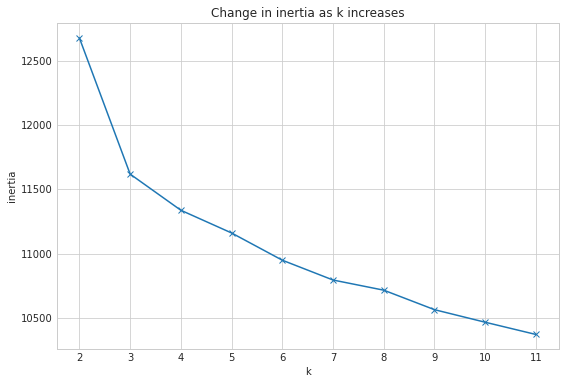

In [52]:
df = clusters(features, train, 3)

In [53]:
train = pd.concat([train, df], axis = 1)
boolean_dummy = pd.get_dummies(train['cluster'], drop_first=False)
train = pd.concat([train, boolean_dummy], axis = 1)

train = train.rename(columns = {
            0:'every_cluster_0', 
            1:'every_cluster_1',
            2:'every_cluster_2',
            'cluster':'everything_cluster'})

In [54]:
X_train = train[[
'every_cluster_0',
'every_cluster_1',
'every_cluster_2']]

y_train = train['winningTeam']

high = 0
highdepth = 0
highleaf = 0
for leaf in range(1, 25):
    for depth in range(1,25):
        rf = RandomForestClassifier(bootstrap=True, 
                            class_weight=None, 
                            criterion='gini',
                            min_samples_leaf=leaf,
                            n_estimators=100,
                            max_depth=depth, 
                            random_state=123)
        results = cross_val_score(rf, X_train, y_train, cv=3)
        if results.mean() > high:
            high = results.mean()
            highdepth = depth
            highleaf = leaf
            print(high, highdepth, highleaf)

0.5730905412240769 1 1


<ipython-input-18-28a934079a2a>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['cluster'] = kmeans.predict(X)


2    547
0    540
1    540
3    350
Name: cluster, dtype: int64
0.5725847243297927 1 1
0.5948406676783005 2 1


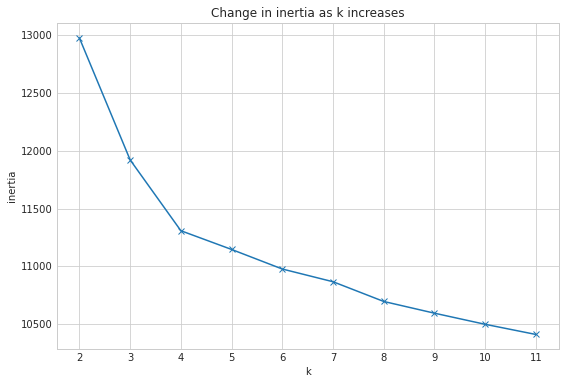

In [55]:
train = pd.read_csv("final10_train_scaled.csv")
test = pd.read_csv("final10_test_scaled.csv")

df = clusters(features, train, 4)

train = pd.concat([train, df], axis = 1)
boolean_dummy = pd.get_dummies(train['cluster'], drop_first=False)
train = pd.concat([train, boolean_dummy], axis = 1)

train = train.rename(columns = {
            0:'every_cluster_0', 
            1:'every_cluster_1',
            2:'every_cluster_2',
            3:'every_cluster_3',
            'cluster':'everything_cluster'})

X_train = train[[
'every_cluster_0',
'every_cluster_1',
'every_cluster_2',
'every_cluster_3']]

y_train = train['winningTeam']

high = 0
highdepth = 0
highleaf = 0
for leaf in range(1, 25):
    for depth in range(1,25):
        rf = RandomForestClassifier(bootstrap=True, 
                            class_weight=None, 
                            criterion='gini',
                            min_samples_leaf=leaf,
                            n_estimators=100,
                            max_depth=depth, 
                            random_state=123)
        results = cross_val_score(rf, X_train, y_train, cv=3)
        if results.mean() > high:
            high = results.mean()
            highdepth = depth
            highleaf = leaf
            print(high, highdepth, highleaf)

<ipython-input-18-28a934079a2a>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['cluster'] = kmeans.predict(X)


1    1590
0     387
Name: cluster, dtype: int64
0.5194739504299443 1 1


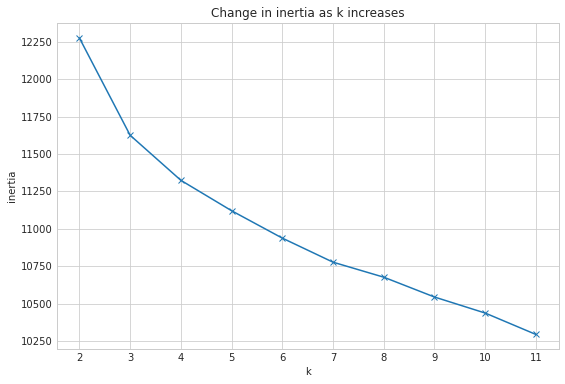

In [56]:
train = pd.read_csv("final10_train_scaled.csv")
test = pd.read_csv("final10_test_scaled.csv")

df = clusters(features, train, 2)

train = pd.concat([train, df], axis = 1)
boolean_dummy = pd.get_dummies(train['cluster'], drop_first=False)
train = pd.concat([train, boolean_dummy], axis = 1)

train = train.rename(columns = {
            0:'every_cluster_0', 
            1:'every_cluster_1',
            'cluster':'everything_cluster'})

X_train = train[[
'every_cluster_0',
'every_cluster_1']]

y_train = train['winningTeam']

high = 0
highdepth = 0
highleaf = 0
for leaf in range(1, 25):
    for depth in range(1,25):
        rf = RandomForestClassifier(bootstrap=True, 
                            class_weight=None, 
                            criterion='gini',
                            min_samples_leaf=leaf,
                            n_estimators=100,
                            max_depth=depth, 
                            random_state=123)
        results = cross_val_score(rf, X_train, y_train, cv=3)
        if results.mean() > high:
            high = results.mean()
            highdepth = depth
            highleaf = leaf
            print(high, highdepth, highleaf)